# Experiment: Study how Raman Scattering of a known object is affected by penetrated laser

**Date**: 05 Sep 2024 

**Sample**: Blood

## Data Collection
### Raman Spectra

| Name           | Value                   |
|----------------|-------------------------|
| slit           | 0.25                    |
| Grating        | 600                     |
| Laser          | 785 nm                  |
| Laser Power    | 7, 350 mW               |
| Spectro Center | 1125 $\texttt{cm}^{-1}$ |
| Exposure Time  | 30 seconds              |
| Accumulation   | 3 times                 |

Total measurement time: 1.5 minutes

In [1]:
from raman_for_glucose_measurement.helper import create_data_from_paths, extract_range
import rampy as rp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path
from glob import glob 

In [2]:
DATA_BASE_PATH:Path = Path("../data/silicon/")
DATA_PATH:Path      = DATA_BASE_PATH.joinpath("penetration")
assert DATA_PATH.exists()

## Load Data

In [3]:
paths:list[str] = glob(str(DATA_PATH.joinpath('*')))
data = create_data_from_paths(paths=paths)
data.sort_values(by=['name'], inplace=True)
data

,path,spectrum,name,grating,laser,exposure,accumulation,datetime
4,../data/silicon/penetration/nolaser_600_785 nm...,"[[-2324.94, 42.0], [-2321.49, 44.6667], [-2318...",nolaser,600,785 nm,30 s,1,2024-10-14 11:19:36
13,../data/silicon/penetration/open-nolaser_600_7...,"[[-2324.94, 45.3333], [-2321.49, 40.3333], [-2...",open-nolaser,600,785 nm,30 s,1,2024-10-14 11:21:20
2,../data/silicon/penetration/silicon_600_785 nm...,"[[-2324.94, 85.3333], [-2321.49, 91.3333], [-2...",silicon,600,785 nm,30 s,1,2024-10-14 11:16:56
14,../data/silicon/penetration/silicon-alcholdrop...,"[[-2324.94, 79.0], [-2321.49, 86.3333], [-2318...",silicon-alcholdropletontop,600,785 nm,30 s,1,2024-10-14 16:59:23
5,../data/silicon/penetration/silicon-alcholshee...,"[[-2324.94, 97.0], [-2321.49, 103.333], [-2318...",silicon-alcholsheetlifted,600,785 nm,30 s,1,2024-10-14 16:56:33
15,../data/silicon/penetration/silicon-coffeedrop...,"[[-2324.94, 46.6667], [-2321.49, 42.0], [-2318...",silicon-coffeedropletontop,600,785 nm,5 s,1,2024-10-14 17:08:13
3,../data/silicon/penetration/silicon-coffeeshee...,"[[-2324.94, 84.0], [-2321.49, 98.6667], [-2318...",silicon-coffeesheetlifted,600,785 nm,30 s,1,2024-10-14 17:04:30
0,../data/silicon/penetration/silicon-glasslifte...,"[[-2324.94, 92.6667], [-2321.49, 104.333], [-2...",silicon-glasslifted,600,785 nm,30 s,1,2024-10-14 11:24:04
1,../data/silicon/penetration/silicon-glassontop...,"[[-2324.94, 92.6667], [-2321.49, 86.3333], [-2...",silicon-glassontop,600,785 nm,30 s,1,2024-10-14 11:29:59
12,../data/silicon/penetration/silicon-slidelifte...,"[[-2324.94, 85.0], [-2321.49, 86.3333], [-2318...",silicon-slidelifted,600,785 nm,30 s,1,2024-10-14 11:27:45


## Noise Checking

In [4]:
def plot(data:pd.DataFrame, title:str=""):
    # colors = {
    #     98: 'blue',
    #     101: 'green',
    #     123: 'black',
    #     186: 'red',
    # }

    plt.figure(figsize=(16,5))
    for index, row in data.iterrows():
        X = row.spectrum[:,0]
        y = row.spectrum[:,1]
        if(row['name'] == 'silicon'):
            plt.plot(X,y, label=f"{row['name']}", linestyle='--')
        else:
            plt.plot(X,y, label=f"{row['name']}")
    # Remove duplicate labels
    # handles, labels = plt.gca().get_legend_handles_labels()
    # labels, ids = np.unique(data.glycemic, return_index=True)
    # handles = [handles[i] for i in ids]
    # plt.legend(handles, labels, loc='best')
    plt.legend()

    plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 12)
    plt.ylabel("intensity, a. u.", fontsize = 12)
    plt.title(title,fontsize = 12,fontweight="bold")
    plt.grid()
    plt.show()



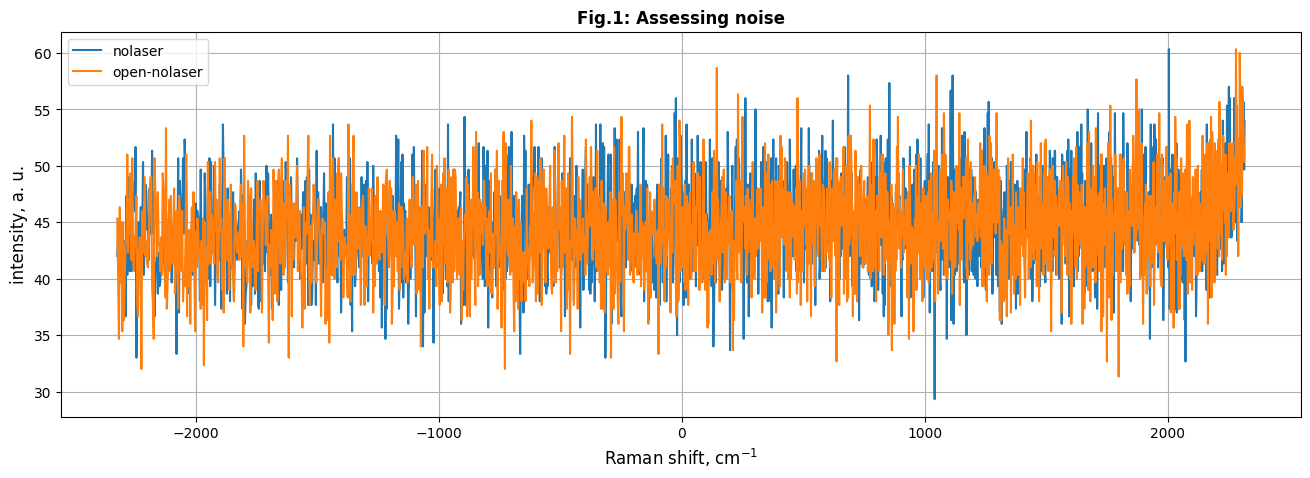

In [5]:
samples = ['nolaser', 'open-nolaser']
plot(data=data.loc[data.name.isin(samples)], title="Fig.1: Assessing noise")

## Signal of Silicon

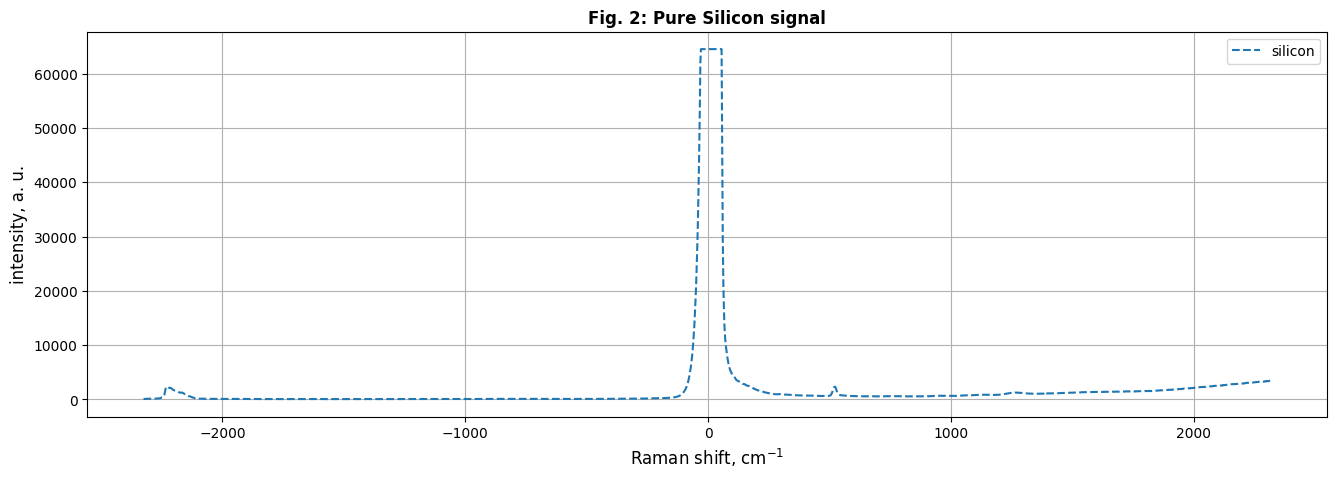

In [6]:
samples = ['silicon']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 2: Pure Silicon signal")

## Extracting interested range

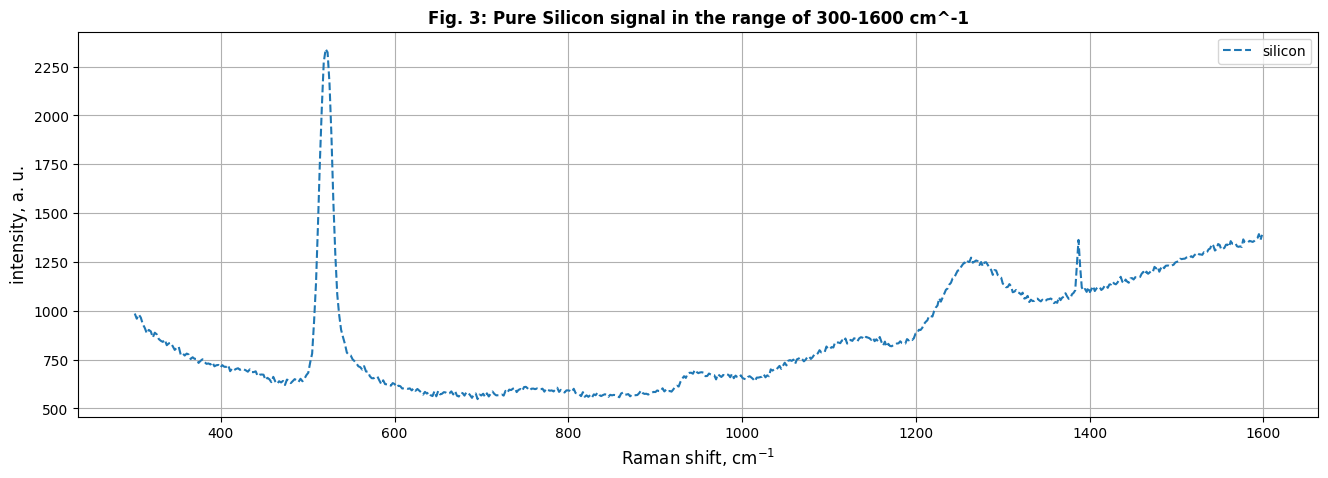

In [12]:
def cal_range(row):
    spectrum = row.spectrum
    return extract_range(spectrum=spectrum, range_from=300, range_to=1600)

samples = ['silicon']
data.spectrum = data.apply(cal_range, axis=1)
plot(data=data.loc[data.name.isin(samples)], title="Fig. 3: Pure Silicon signal in the range of 300-1600 cm^-1")

## Ploting baseline with obscure

### Glass slide
<img src="https://irrorwxhpkioli5p.ldycdn.com/cloud/loBpnKkilpSRrjknoopniq/1.jpg" alt="drawing" width="400"/>

Definition: the common microscope glass slide is called `slide` and `glass` for calling the thin version.

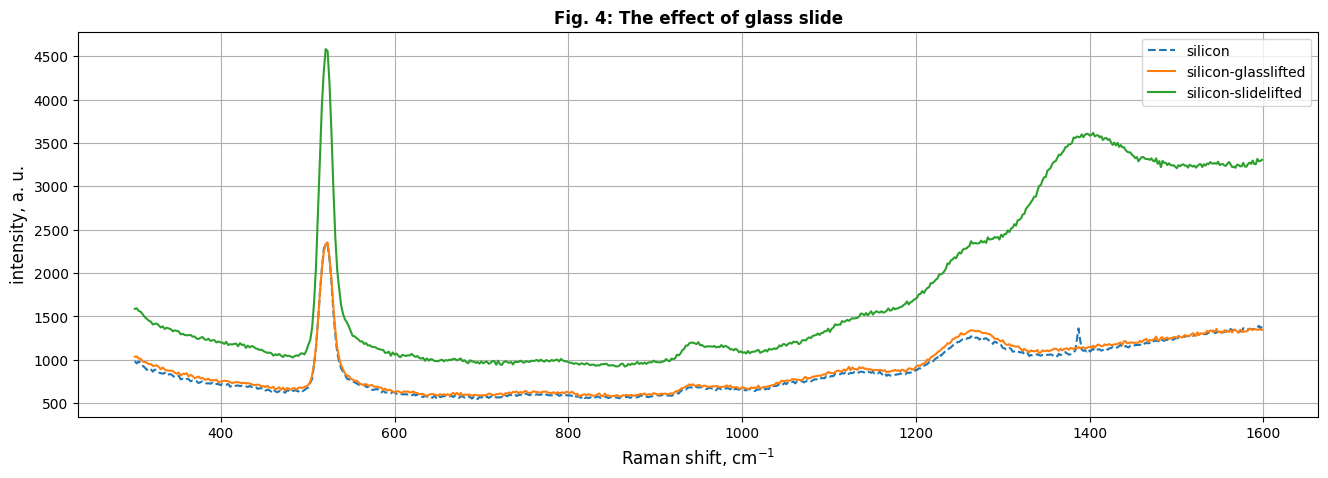

In [14]:
samples = ['silicon','silicon-glasslifted','silicon-slidelifted']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 4: The effect of glass slide")

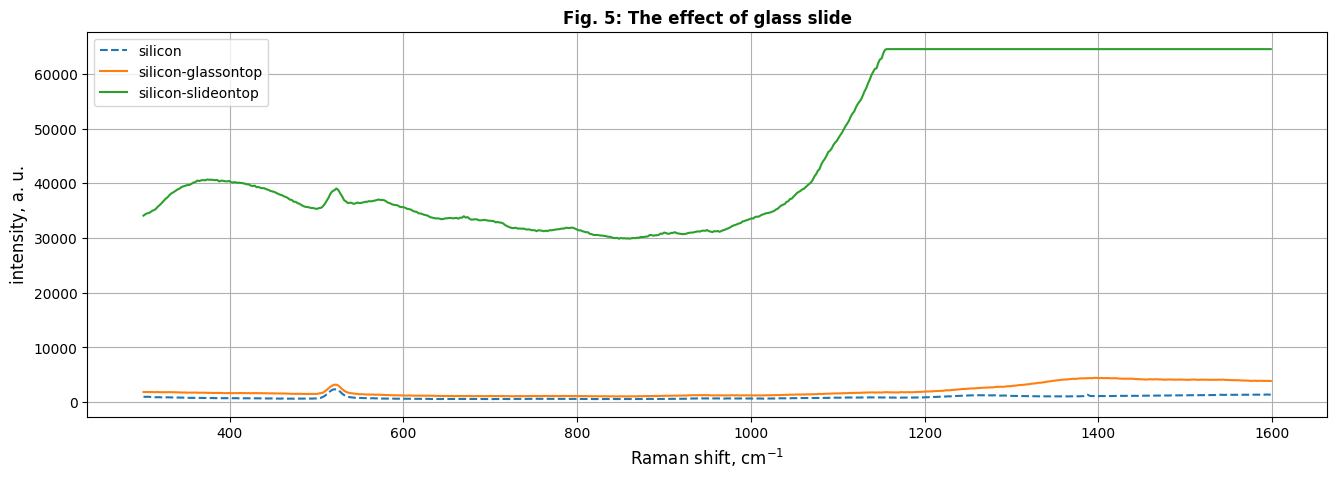

In [17]:
samples = ['silicon','silicon-glassontop','silicon-slideontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 5: The effect of glass slide")

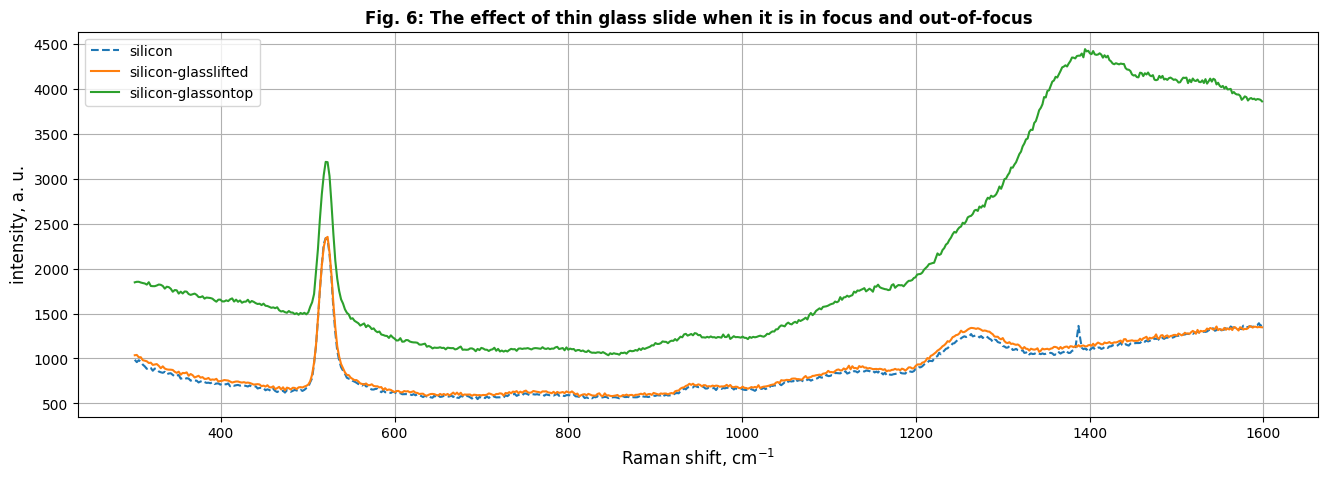

In [19]:
samples = ['silicon','silicon-glasslifted','silicon-glassontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 6: The effect of thin glass slide when it is in focus and out-of-focus")

Thin glass slide introduced the least effect when it is out of focus.

This could means that the laser is abel to penetrate through the thin glass slide with out an effect.

However, when the thin glass slide is directly on top of the sample, we can observe changes in the measurement.

This might be due to the substrate itself has Raman signal because it is in focus too.

### Tissue

<img src="https://www.stanleypackaging.com.au/wp-content/uploads/2023/08/SPF2180-1.jpg" alt="drawing" width="400"/>

Aseessing the penetration when the obscure is not so transparency but thin.

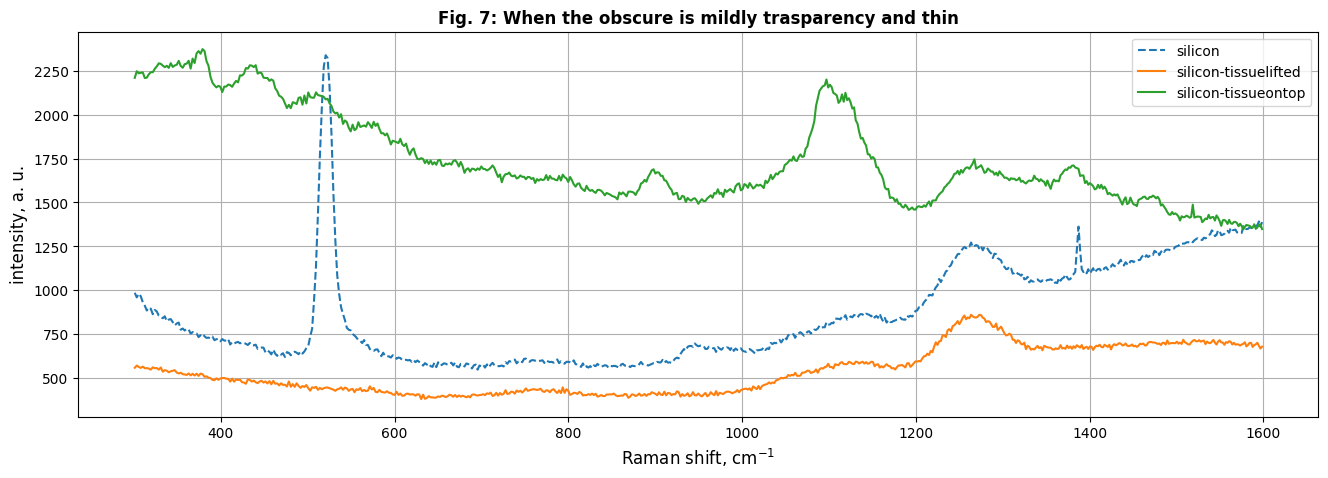

In [20]:
samples = ['silicon','silicon-tissuelifted','silicon-tissueontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 7: When the obscure is mildly trasparency and thin")

It seems that the thin tissue completely blocked the laser (order the power of penetrated laser is too low).

Thus, the out-of-focus configuration only has Raman above 1000 cm^-1 which looks more like a fluorescence noise signal.

And, the in-focus configuration, we could not observe a peak of silicon.

### Liquid transparency

Here we ask, how would a obscure liquid effect the penetration.

To assess this, we have three liquid samples.

1. Tap water: representing the most transparency
2. Ethyl Alcohol: representing somewhat clear
3. Hot americano: representing mildly transparency

To assess the out-of-focus (lifted), we dropped the sample on a thin glass substrate since the substrate introduce minor effect on the Raman signal.

#### Tap water

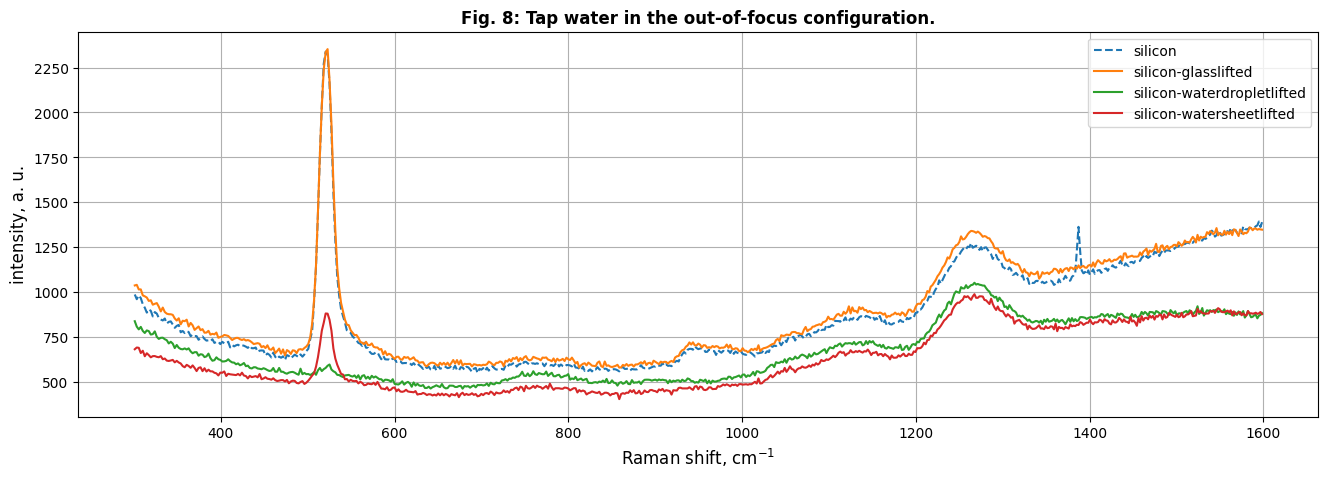

In [22]:
samples = ['silicon', 'silicon-glasslifted', 'silicon-waterdropletlifted','silicon-watersheetlifted']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 8: Tap water in the out-of-focus configuration.")

It is clear that even the clearest liquid has an effect on laser.

The droplet configuration causes laser to disperse because the shape of the suface is rounded and curved while the sheet configuration let the laser pass through easier.

However, because the laser travel through 4 mediums (air, water, thin glass, air) at an angle, there was some dispersion.

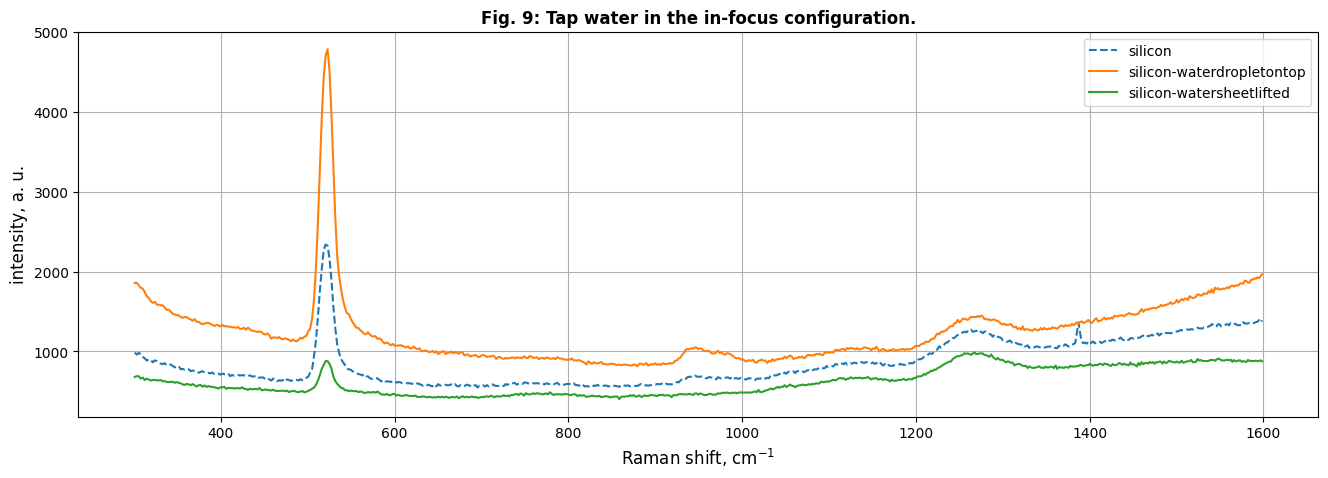

In [23]:
samples = ['silicon','silicon-watersheetlifted','silicon-waterdropletontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 9: Tap water in the in-focus configuration.")

When the droplet is placed on top of the silicon, it acts as a magnifying glass.

#### Ethyl Alcohol

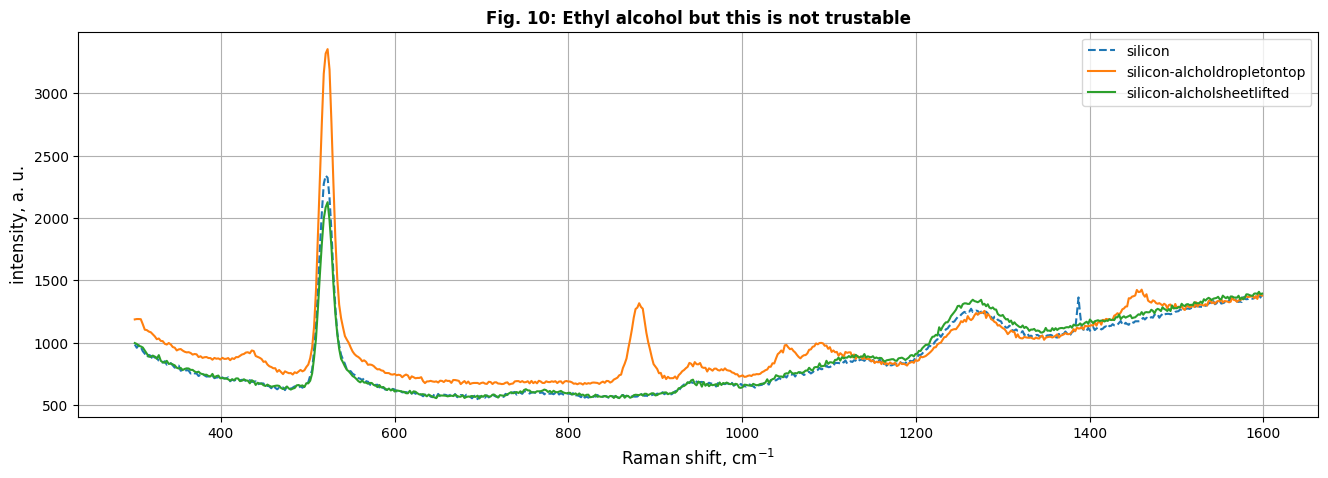

In [25]:
samples = ['silicon','silicon-alcholsheetlifted','silicon-alcholdropletontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 10: Ethyl alcohol but this is not trustable")

It is not trustable because the ethyl alcohol evaporate quickly during the measurement.
But we could still see some effect of the sample.

#### Coffee

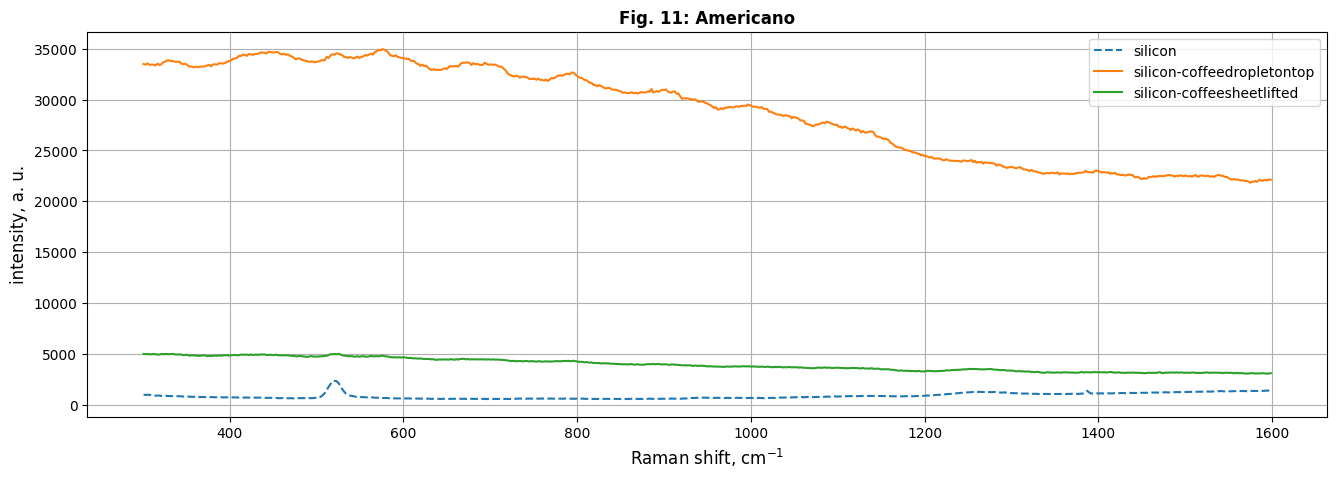

In [26]:
samples = ['silicon','silicon-coffeesheetlifted','silicon-coffeedropletontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 11: Americano")

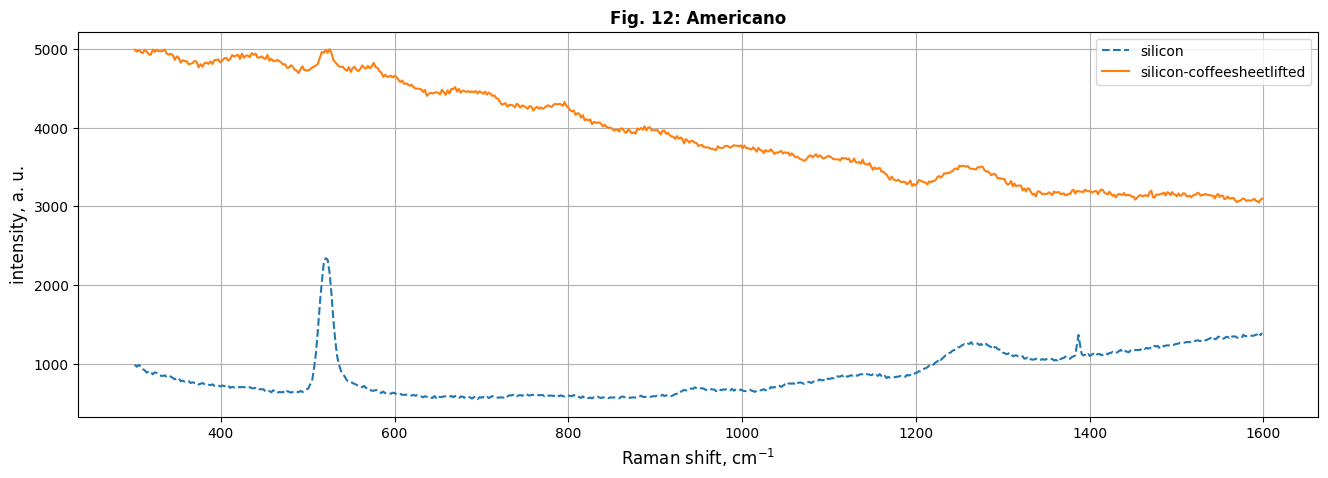

In [28]:
samples = ['silicon','silicon-coffeesheetlifted']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 12: Americano")

Americano in the droplet configuration emit a hughe Raman in the measurement.